In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('talk')

In [3]:
df_costs = pd.read_csv("sim_data_full_with_costs_corrected.csv")
df_costs = df_costs[["archetype", "transmission_level", "scenario_number", "mean", "std", "mean_iptsc", "std_iptsc"]]
df_costs.rename(columns={"mean": "cost_mean", "std": "cost_std", "mean_iptsc": "cost_IPTsc_mean", "std_iptsc": "cost_IPTsc_std"}, inplace=True)

df_raw = pd.read_csv("sim_data_raw.csv")
df_raw = df_raw[["archetype", "transmission_level", "scenario_number", "clinical_incidence_all"]]
df_raw["cases"] = df_raw["clinical_incidence_all"]*5000
# Get mean and stdev of cases
df_cases = df_raw.groupby(["archetype", "transmission_level", "scenario_number"]).agg({"cases": ["mean", "std"]}).reset_index()
df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])

df_scenarios = pd.read_csv("../../run_sims/Assets/scenario_master_list.csv")
df = pd.merge(df, df_scenarios[["archetype", "scenario_number", "comments"]], on=["archetype", "scenario_number"])

C:\Users\joshsu\AppData\Local\Temp\ipykernel_23512\2390756690.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])
C:\Users\joshsu\AppData\Local\Temp\ipykernel_23512\2390756690.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])


In [4]:
df_raw2 = df_raw.merge(df_scenarios[["archetype", "scenario_number", "comments"]], on=["archetype", "scenario_number"], how="left")

In [5]:
foo = df_raw2[(df_raw2["archetype"] == "Southern") & (df_raw2["transmission_level"] == 0.2) & (df_raw2["scenario_number"] == 0)]
bar = df_raw2[(df_raw2["archetype"] == "Southern") & (df_raw2["transmission_level"] == 0.2) & (df_raw2["scenario_number"] == 6)]

In [6]:
foo

,archetype,transmission_level,scenario_number,clinical_incidence_all,cases,comments
3200,Southern,0.2,0,0.980618,4903.091278,No IPTsc
3201,Southern,0.2,0,0.992449,4962.242515,No IPTsc
3202,Southern,0.2,0,1.039380,5196.898209,No IPTsc
3203,Southern,0.2,0,0.995974,4979.872222,No IPTsc
3204,Southern,0.2,0,0.986470,4932.351981,No IPTsc
...,...,...,...,...,...,...
3295,Southern,0.2,0,0.963487,4817.432757,No IPTsc
3296,Southern,0.2,0,1.030089,5150.443150,No IPTsc
3297,Southern,0.2,0,1.019992,5099.958281,No IPTsc
3298,Southern,0.2,0,0.965481,4827.404057,No IPTsc


In [7]:
bar

,archetype,transmission_level,scenario_number,clinical_incidence_all,cases,comments
4200,Southern,0.2,6,0.940225,4701.123108,ASAQ term
4201,Southern,0.2,6,0.934719,4673.595168,ASAQ term
4202,Southern,0.2,6,0.968968,4844.838308,ASAQ term
4203,Southern,0.2,6,0.924292,4621.459541,ASAQ term
4204,Southern,0.2,6,0.902722,4513.609136,ASAQ term
...,...,...,...,...,...,...
4295,Southern,0.2,6,0.913068,4565.337876,ASAQ term
4296,Southern,0.2,6,0.956124,4780.622122,ASAQ term
4297,Southern,0.2,6,0.985578,4927.888035,ASAQ term
4298,Southern,0.2,6,0.928877,4644.383775,ASAQ term


(array([ 1.,  4., 14., 13., 27., 16.,  9., 10.,  4.,  2.]),
 array([4422.17360123, 4479.92242576, 4537.67125028, 4595.4200748 ,
        4653.16889932, 4710.91772384, 4768.66654836, 4826.41537288,
        4884.1641974 , 4941.91302193, 4999.66184645]),
 <BarContainer object of 10 artists>)

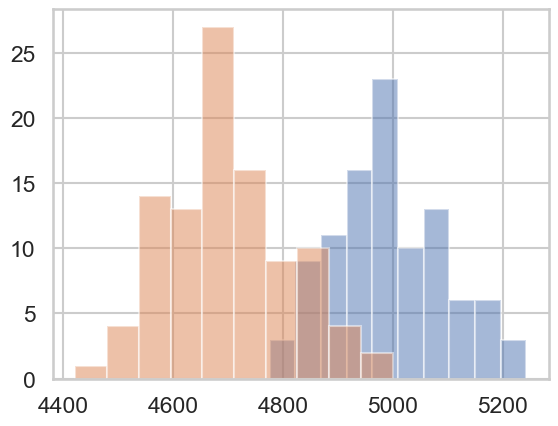

In [8]:
# Show raw counts vs mean and stdev
# plt.scatter(foo[""])
# Plot vertical lines at each cases value
# plt.errorbar(foo["scenario_number"], foo["cases"], yerr=foo["cases"]/np.sqrt(1000), fmt='o')
plt.hist(foo["cases"], bins=10, alpha=0.5)
plt.hist(bar["cases"], bins=10, alpha=0.5)

# Plot 

(array([  2.,   4.,   7.,  22.,  41.,  58.,  74., 100., 137., 118.,  88.,
         98.,  76.,  67.,  52.,  30.,  14.,   6.,   5.,   1.]),
 array([-142.3142608 ,  -97.53051626,  -52.74677171,   -7.96302717,
          36.82071737,   81.60446192,  126.38820646,  171.171951  ,
         215.95569555,  260.73944009,  305.52318463,  350.30692918,
         395.09067372,  439.87441826,  484.65816281,  529.44190735,
         574.22565189,  619.00939644,  663.79314098,  708.57688552,
         753.36063007]),
 <BarContainer object of 20 artists>)

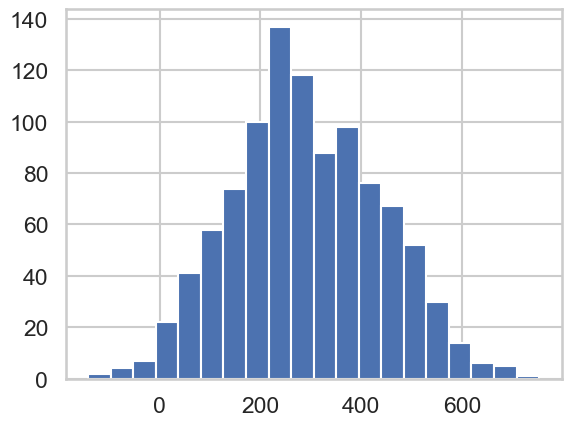

In [9]:
# Sample cases averted, with no limitations
# Sample directly from foo["cases"] and bar["cases"]
c1 = np.random.choice(foo["cases"], size=1000)
c2 = np.random.choice(bar["cases"], size=1000)

# Calculate the difference
diff = c1 - c2

# Plot the difference
plt.hist(diff, bins=20)

(array([22., 25., 42., 54., 61., 62., 97., 87., 95., 93., 72., 71., 50.,
        51., 41., 30.,  9.,  8.,  5.,  2.]),
 array([  1.62806524,  36.89538481,  72.16270439, 107.43002396,
        142.69734354, 177.96466312, 213.23198269, 248.49930227,
        283.76662185, 319.03394142, 354.301261  , 389.56858057,
        424.83590015, 460.10321973, 495.3705393 , 530.63785888,
        565.90517846, 601.17249803, 636.43981761, 671.70713718,
        706.97445676]),
 <BarContainer object of 20 artists>)

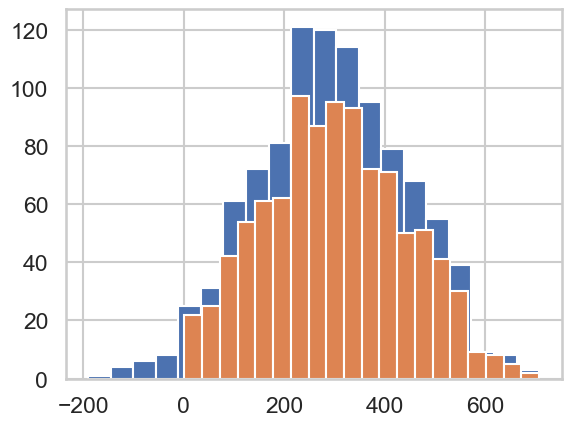

In [10]:
# Sample cases averted, with no limitations
# Sample directly from foo["cases"] and bar["cases"], but now reject samples that are less than 0
c1 = np.random.choice(foo["cases"], size=1000)
c2 = np.random.choice(bar["cases"], size=1000)

# Calculate the difference
diff = c1 - c2

# Plot the difference
plt.hist(diff, bins=20)
plt.hist(diff[diff > 0], bins=20)

0.0238


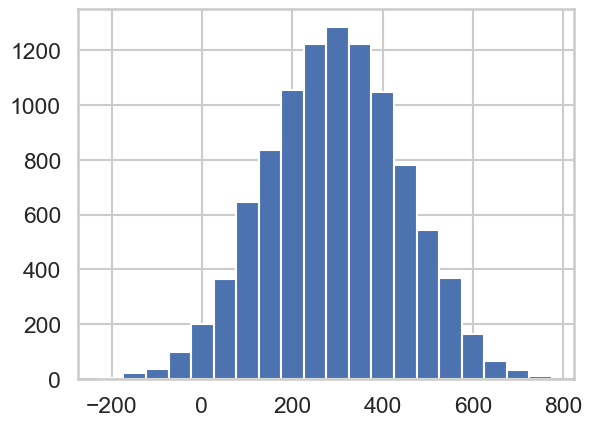

In [13]:
# Sample cases averted, with no limitations
# Sample directly from foo["cases"] and bar["cases"], but now reject samples that are less than 0
c1 = np.random.choice(foo["cases"], size=10000)
c2 = np.random.choice(bar["cases"], size=10000)

# Calculate the difference
diff = c1 - c2

# Plot the difference
plt.hist(diff, bins=20)
# plt.hist(diff[diff > 0], bins=20)

# Print the probability of a negative difference
print(np.sum(diff < 0)/len(diff))

In [14]:
# What if we broke it down into 4 categories, and probabilities of each
df_costs

,archetype,transmission_level,scenario_number,cost_mean,cost_std,cost_IPTsc_mean,cost_IPTsc_std
0,Central,0.05,0,27033.363580,4220.771814,0.000000,0.000000
1,Central,0.05,5,22855.555324,3445.400487,0.000000,0.000000
2,Central,0.05,6,28774.074276,3835.152515,4686.802973,650.289079
3,Central,0.05,7,31208.624665,3579.317443,16474.150364,2602.503140
4,Central,0.05,8,31525.574512,2909.548986,13053.318339,688.024777
...,...,...,...,...,...,...,...
110,Southern,0.40,5,45600.264481,7211.276095,0.000000,0.000000
111,Southern,0.40,6,48092.209036,7072.012439,4488.452458,621.611041
112,Southern,0.40,7,52907.274806,6287.415975,17164.300352,2719.086228
113,Southern,0.40,8,49977.913421,6005.660876,12538.273669,647.486072


In [15]:
a = df_costs[(df_costs["archetype"] == "Southern") & (df_costs["transmission_level"] == 0.2) & (df_costs["scenario_number"] == 0)]
b = df_costs[(df_costs["archetype"] == "Southern") & (df_costs["transmission_level"] == 0.2) & (df_costs["scenario_number"] == 6)]

0.6527


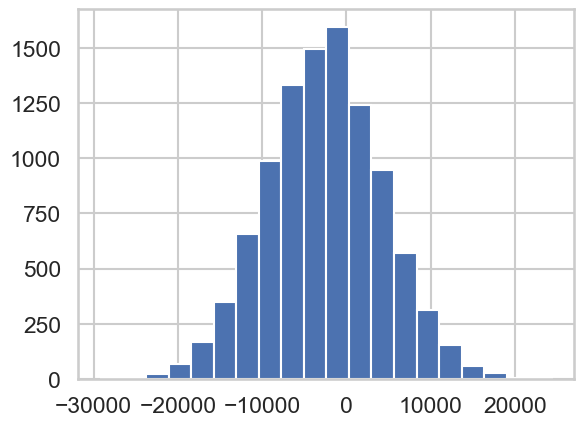

In [24]:
# Sample costs from a and b, and calculate the difference
c1 = np.random.normal(a["cost_mean"].values[0], a["cost_std"].values[0], size=10000)
c2 = np.random.normal(b["cost_mean"].values[0], b["cost_std"].values[0], size=10000)

# Calculate the difference
diff = c1 - c2

# Plot the difference
plt.hist(diff, bins=20)

# Print the probability of a negative difference
print(np.sum(diff < 0)/len(diff))

array([27807.08210361, 26928.14264032, 29092.96673342, ...,
       32293.57028081, 28837.94568372, 28570.26640726])

In [27]:
bar = df_raw2[(df_raw2["archetype"] == "Southern") & (df_raw2["transmission_level"] == 0.2) & (df_raw2["scenario_number"] == 8)]
bar

,archetype,transmission_level,scenario_number,clinical_incidence_all,cases,comments
5200,Southern,0.2,8,0.744599,3722.995190,DP term
5201,Southern,0.2,8,0.768381,3841.902702,DP term
5202,Southern,0.2,8,0.768291,3841.453080,DP term
5203,Southern,0.2,8,0.747785,3738.927314,DP term
5204,Southern,0.2,8,0.756352,3781.761709,DP term
...,...,...,...,...,...,...
5295,Southern,0.2,8,0.775804,3879.021839,DP term
5296,Southern,0.2,8,0.744902,3724.512024,DP term
5297,Southern,0.2,8,0.774869,3874.345665,DP term
5298,Southern,0.2,8,0.767031,3835.153401,DP term
